In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 3.1 Linear Basis Function Models

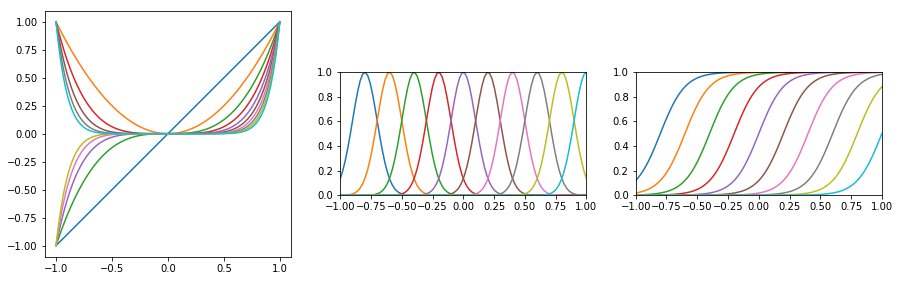

In [3]:
def polynomial(X, M):
    N = X.shape[0]
    Y = np.zeros([N, M])
    for i in range(M):
        Y[:, i] = X.reshape(-1)**i
    return Y

def gaussian(X, M):
    mean_value = np.linspace(-1,1,M)
    s = 0.1
    Y = np.zeros([X.shape[0], M])
    for i in range(M):
        Y[:, i] = np.exp(-0.5*(X.reshape(-1)-mean_value[i])**2/s**2)
    return Y

def sigmoid(X, M):
    mean_value = np.linspace(-1,1,M)
    s = 0.1
    Y = np.zeros([X.shape[0], M])
    for i in range(M):
        Y[:, i] = 1/(1+np.exp(-(X.reshape(-1)-mean_value[i])/s))
    return Y

x = np.linspace(-1,1,100).reshape(-1,1)

M = 11
Y = polynomial(x, M)
plt.figure(figsize=[15, 10])
plt.subplot(1, 3, 1)
for i in range(1, M):
    plt.plot(x, Y[:,i])
plt.gca().set_aspect('equal', adjustable='box')

Y = gaussian(x, M)
plt.subplot(1, 3, 2)
for i in range(1, M):
    plt.plot(x, Y[:, i])
plt.xlim(-1,1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')

Y = sigmoid(x, M)
plt.subplot(1, 3, 3)
for i in range(1, M):
    plt.plot(x, Y[:, i])
plt.xlim(-1,1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')



# 3.3 Bayesian Linear Regression

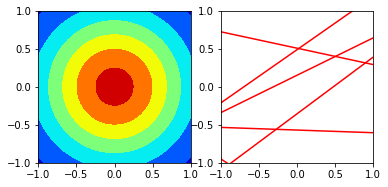

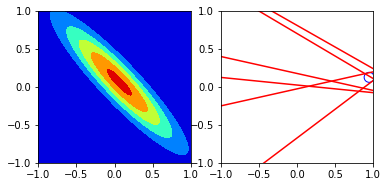

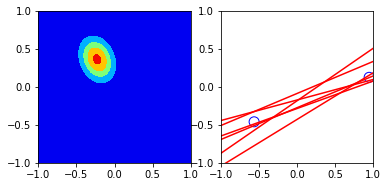

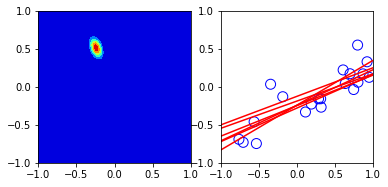

In [119]:
def gaussian(X, Y, mu, sigma):
    n = X.shape[1]
    X = np.array([X.reshape(-1), Y.reshape(-1)])
    N = X.shape[1]
    p = np.zeros([N, 1])
    for i in range(N):
        p[i] = 1/(2*np.pi*np.linalg.det(sigma)**0.5)*np.exp(-0.5*(X[:,i]-mu).reshape(-1,2)@np.linalg.inv(sigma)@(X[:,i]-mu).reshape(-1,1))
    return p.reshape(n, n)

a0, a1 = -0.3, 0.5
d = 2
samplesize = 20
train_x = np.random.uniform(-1,1,samplesize)
train_y = a0 + a1 * train_x + np.random.normal(0, 0.2, samplesize)
train_X = np.array([np.ones(samplesize), train_x]).T
train_Y = train_y.reshape(-1,1)
alpha = 2.0
beta = 1/0.2**2
mu_prior = np.array([0, 0])
sigma_prior = 1/alpha*np.eye(2)
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.subplot(1,2,1)
plt.contourf(X, Y, gaussian(X, Y,  mu_prior, sigma_prior), 5, cmap='jet')
plt.gca().set_aspect('equal', adjustable='box')

line_num = 6
W = np.random.multivariate_normal(mu_prior, sigma_prior, line_num)
plt.subplot(1,2,2)
for i in range(line_num):
    plt.plot(x, W[i,0] + W[i,1]*x, color='red', )
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')


inv_S = alpha*np.eye(d) + beta*(train_X[0,:].reshape(-1,2)).T@train_X[0,:].reshape(-1,2)
mu = beta*np.linalg.inv(inv_S)@(train_X[0,:].reshape(-1,2)).T@train_Y[0:1].reshape(-1,1)
plt.figure()
plt.subplot(1,2,1)
plt.contourf(X, Y, gaussian(X, Y,  mu.reshape(-1), np.linalg.inv(inv_S)), 5, cmap='jet')
plt.gca().set_aspect('equal', adjustable='box')

W = np.random.multivariate_normal(mu.flatten(), np.linalg.inv(inv_S), line_num)
plt.subplot(1,2,2)
for i in range(line_num):
    plt.plot(x, W[i,0] + W[i,1]*x, color='red', )
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(train_x[0:1], train_y[0:1], edgecolors='blue', color='', s=100)

inv_S = alpha*np.eye(d) + beta*(train_X[0:2,:].reshape(-1,2)).T@train_X[0:2,:].reshape(-1,2)
mu = beta*np.linalg.inv(inv_S)@(train_X[0:2,:].reshape(-1,2)).T@train_Y[0:2].reshape(-1,1)
plt.figure()
plt.subplot(1,2,1)
plt.contourf(X, Y, gaussian(X, Y,  mu.reshape(-1), np.linalg.inv(inv_S)), 5, cmap='jet')
plt.gca().set_aspect('equal', adjustable='box')


W = np.random.multivariate_normal(mu.flatten(), np.linalg.inv(inv_S), line_num)
plt.subplot(1,2,2)
for i in range(line_num):
    plt.plot(x, W[i,0] + W[i,1]*x, color='red', )
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(train_x[0:2], train_y[0:2], edgecolors='blue', color='', s=100)

inv_S = alpha*np.eye(d) + beta*(train_X.reshape(-1,2)).T@train_X.reshape(-1,2)
mu = beta*np.linalg.inv(inv_S)@(train_X.reshape(-1,2)).T@train_Y.reshape(-1,1)
plt.figure()
plt.subplot(1,2,1)
plt.contourf(X, Y, gaussian(X, Y,  mu.reshape(-1), np.linalg.inv(inv_S)), 5, cmap='jet')
plt.gca().set_aspect('equal', adjustable='box')

W = np.random.multivariate_normal(mu.flatten(), np.linalg.inv(inv_S), line_num)
plt.subplot(1,2,2)
for i in range(line_num):
    plt.plot(x, W[i,0] + W[i,1]*x, color='red', )
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(train_x, train_y, edgecolors='blue', color='', s=100)

In [105]:
train_X[0:2,:]

array([[ 1.        , -0.63114033],
       [ 1.        , -0.0355314 ]])

In [102]:
mu.reshape(-1)

array([0.1033121 , 0.09465182])

In [87]:
train_Y[0:1].reshape(-1,1)

array([[-0.81125092]])

In [22]:
(z[:,1]-mu_prior).reshape(-1,2).shape

(1, 2)